# Intake Civis Driver

This project is an intake plugin for Civis databases.
It allows easy ingest of tables from the Civis platform,
and integration with other intake YAML catalogs.

## Direct invocation

You can use this driver directly by creating civis catalogs and sources:

In [1]:
import intake_civis

cat = intake_civis.CivisCatalog(
    "City of Los Angeles - Postgres",
    schema="transportation",
)

In [2]:
list(cat)

['bike_trips']

In [3]:
cat.bike_trips

name: "transportation"."bike_trips"
container: dataframe
plugin: ['civis']
description: Civis table bike_trips from City of Los Angeles - Postgres
direct_access: True
user_parameters: []
metadata: 
args: 
  api_key: None
  civis_kwargs: 
  database: City of Los Angeles - Postgres
  table: "transportation"."bike_trips"

In [4]:
df = cat.bike_trips.read()
df.head()

,trip_id,bike_type,end_datetime,end_station,end_station_name,name_group,optional_kiosk_id_group,start_datetime,start_station,start_station_name,visible_id,distance,duration,est_calories,est_carbon_offset
0,139402893,Electric Bike,2020-03-16 00:31:07,3064,Grand & 7th,Annual Pass,DTLA,2020-03-16 00:28:22,3051,7th & Broadway,19005,0.4,3,18,3.158
1,139403093,Electric Bike,2020-03-16 00:43:26,3040,Wilshire & Witmer,Annual Pass,DTLA,2020-03-16 00:33:01,3064,Grand & 7th,19779,1.5,10,60,10.526
2,139403793,Electric Bike,2020-03-16 01:11:54,3049,2nd & Figueroa,1-Ride,DTLA,2020-03-16 01:06:03,3005,7th & Flower,16342,0.8,5,30,5.263
3,139403794,Electric Bike,2020-03-16 01:12:48,4300,Union & Olympic,Monthly Pass,DTLA,2020-03-16 00:56:32,3006,Olive & 8th,18926,2.4,16,96,16.842
4,139405393,Electric Bike,2020-03-16 02:26:24,3026,Figueroa & Cesar Chavez,Annual Pass,DTLA,2020-03-16 02:12:12,4491,Main & Winston,18984,2.1,14,84,14.737


## Usage with a catalog

We can also use this driver from a standard intake YAML catalog:

In [5]:
import intake
cat = intake.open_catalog("catalog.yml")

In [6]:
# Reading an entire schema as a subcatalog, then pulling a table from that
df = cat.postgres.bike_trips.read()
df.head()

,trip_id,bike_type,end_datetime,end_station,end_station_name,name_group,optional_kiosk_id_group,start_datetime,start_station,start_station_name,visible_id,distance,duration,est_calories,est_carbon_offset
0,139402893,Electric Bike,2020-03-16 00:31:07,3064,Grand & 7th,Annual Pass,DTLA,2020-03-16 00:28:22,3051,7th & Broadway,19005,0.4,3,18,3.158
1,139403093,Electric Bike,2020-03-16 00:43:26,3040,Wilshire & Witmer,Annual Pass,DTLA,2020-03-16 00:33:01,3064,Grand & 7th,19779,1.5,10,60,10.526
2,139403793,Electric Bike,2020-03-16 01:11:54,3049,2nd & Figueroa,1-Ride,DTLA,2020-03-16 01:06:03,3005,7th & Flower,16342,0.8,5,30,5.263
3,139403794,Electric Bike,2020-03-16 01:12:48,4300,Union & Olympic,Monthly Pass,DTLA,2020-03-16 00:56:32,3006,Olive & 8th,18926,2.4,16,96,16.842
4,139405393,Electric Bike,2020-03-16 02:26:24,3026,Figueroa & Cesar Chavez,Annual Pass,DTLA,2020-03-16 02:12:12,4491,Main & Winston,18984,2.1,14,84,14.737


In [7]:
# Reading a single table
df = cat.bike_trips.read()
df.head()

,trip_id,bike_type,end_datetime,end_station,end_station_name,name_group,optional_kiosk_id_group,start_datetime,start_station,start_station_name,visible_id,distance,duration,est_calories,est_carbon_offset
0,139402893,Electric Bike,2020-03-16 00:31:07,3064,Grand & 7th,Annual Pass,DTLA,2020-03-16 00:28:22,3051,7th & Broadway,19005,0.4,3,18,3.158
1,139403093,Electric Bike,2020-03-16 00:43:26,3040,Wilshire & Witmer,Annual Pass,DTLA,2020-03-16 00:33:01,3064,Grand & 7th,19779,1.5,10,60,10.526
2,139403793,Electric Bike,2020-03-16 01:11:54,3049,2nd & Figueroa,1-Ride,DTLA,2020-03-16 01:06:03,3005,7th & Flower,16342,0.8,5,30,5.263
3,139403794,Electric Bike,2020-03-16 01:12:48,4300,Union & Olympic,Monthly Pass,DTLA,2020-03-16 00:56:32,3006,Olive & 8th,18926,2.4,16,96,16.842
4,139405393,Electric Bike,2020-03-16 02:26:24,3026,Figueroa & Cesar Chavez,Annual Pass,DTLA,2020-03-16 02:12:12,4491,Main & Winston,18984,2.1,14,84,14.737


## Geospatial support

The Civis Postgres instances com equipped with the PostGIS extension,
allowing for geospatial queries. Unfortunately, the Civis API client
does not know how to interpret geometries, so it returns them as a byte string.

However, you can tell `intake-civis` that a column or set of columns
should be interpreted as a geometry, then it will convert the resulting
dataframe to a GeoDataFrame:

In [8]:
source = intake_civis.CivisSource(
    database="City of Los Angeles - Postgres",
    table="scratch.council_districts",
    geometry="geom",
)

In [9]:
gdf = source.read()
gdf

,gid,objectid,name,effective,revised,district,district_n,tooltip,nla_url,geom
0,1,1,Gilbert Cedillo,2013-07-01,1970-01-01,1,1 - Gilbert Cedillo,Councilmember: Gilbert Cedillo\nDistrict: 1,"https://cd1.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.26854 34.04665, -118.2687..."
1,2,2,Paul Krekorian,2010-01-05,1970-01-01,2,2 - Paul Krekorian,Councilmember: Paul Krekorian\nDistrict: 2,"https://cd2.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.33733 34.22104, -118.3345..."
2,3,3,Bob Blumenfield,2013-07-01,1970-01-01,3,3 - Bob Blumenfield,Councilmember: Bob Blumenfield\nDistrict: 3,"https://cd3.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.51861 34.20841, -118.5186..."
3,4,4,David Ryu,2015-07-01,1970-01-01,4,4 - David Ryu,Councilmember: David Ryu\nDistrict: 4,"https://cd4.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.43999 34.17940, -118.4399..."
4,5,5,Paul Koretz,2009-07-01,1970-01-01,5,5 - Paul Koretz,Councilmember: Paul Koretz\nDistrict: 5,"https://cd5.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.51849 34.18662, -118.5185..."
5,6,6,Nury Martinez,2013-08-09,1970-01-01,6,6 - Nury Martinez,Councilmember: Nury Martinez\nDistrict: 6,"https://cd6.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.36534 34.22871, -118.3641..."
6,7,7,Monica Rodriguez,2017-07-01,1970-01-01,7,7 - Monica Rodriguez,Councilmember: Monica Rodriguez\nDistrict: 7,"https://cd7.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.33733 34.22104, -118.3373..."
7,8,8,Marqueece Harris-Dawson,2015-07-01,1970-01-01,8,8 - Marqueece Harris-Dawson,Councilmember: Marqueece Harris-Dawson\nDistri...,"https://cd8.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.30028 34.03694, -118.2963..."
8,9,9,Curren D. Price Jr.,2013-07-01,1970-01-01,9,9 - Curren D. Price Jr.,Councilmember: Curren D. Price Jr.\nDistrict: 9,"https://cd9.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.23977 34.01480, -118.2397..."
9,10,10,Herb J. Wesson Jr.,2005-07-01,1970-01-01,10,10 - Herb J. Wesson Jr.,Councilmember: Herb J. Wesson Jr.\nDistrict: 10,"https://cd10.lacity.org/?nla_win=p,75,75","MULTIPOLYGON (((-118.28432 34.06372, -118.2842..."


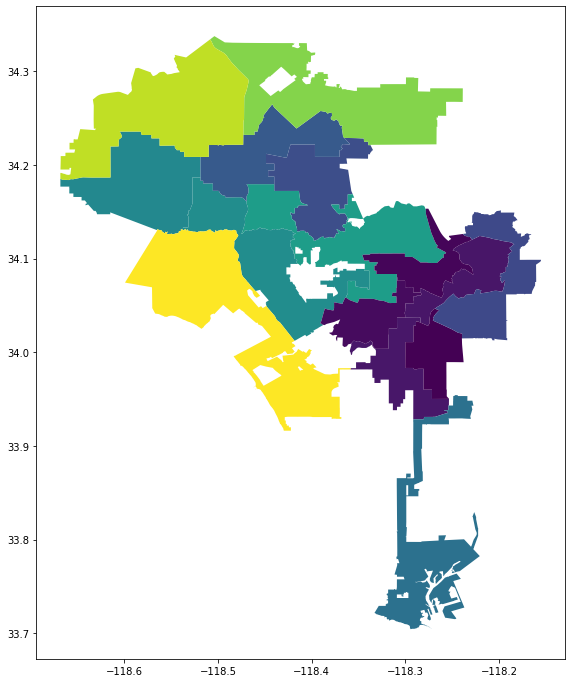

In [10]:
gdf.plot(figsize=(12,12), column=gdf.area)